In [2]:
import tensorflow as tf
import os
import re
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


images/animal1.jpg


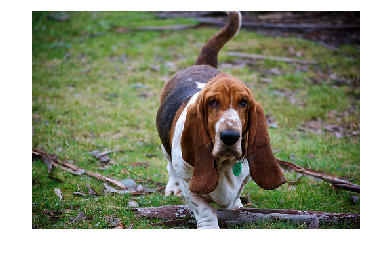

animal (score = 0.44528)
plane (score = 0.19917)
flower (score = 0.14216)
house (score = 0.11108)
guitar (score = 0.10230)
images/animal2.jpg


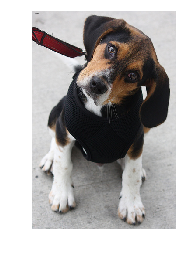

animal (score = 0.55403)
plane (score = 0.16797)
flower (score = 0.14091)
house (score = 0.07262)
guitar (score = 0.06447)
images/animal3.jpg


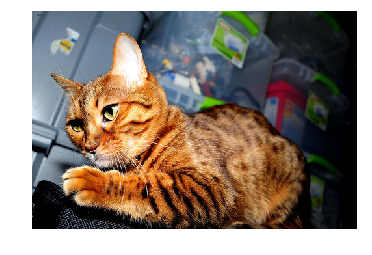

animal (score = 0.90524)
flower (score = 0.03048)
plane (score = 0.02931)
guitar (score = 0.01753)
house (score = 0.01743)
images/flower1.jpg


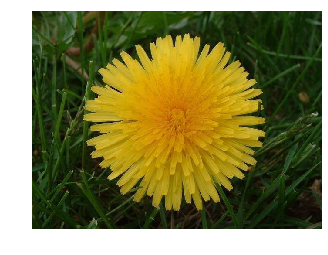

flower (score = 0.98904)
animal (score = 0.00380)
plane (score = 0.00300)
house (score = 0.00259)
guitar (score = 0.00156)
images/flower2.jpg


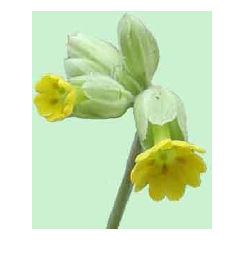

flower (score = 0.98540)
house (score = 0.00521)
animal (score = 0.00389)
plane (score = 0.00312)
guitar (score = 0.00238)
images/flower3.jpg


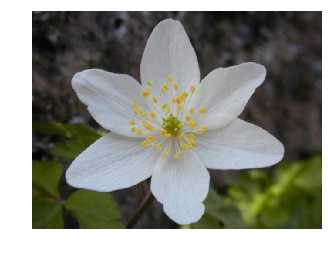

flower (score = 0.98576)
animal (score = 0.00404)
house (score = 0.00359)
guitar (score = 0.00336)
plane (score = 0.00326)
images/guitar1.jpg


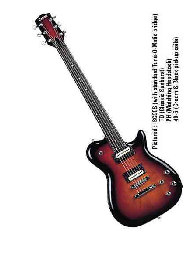

guitar (score = 0.97040)
animal (score = 0.00912)
flower (score = 0.00779)
plane (score = 0.00648)
house (score = 0.00621)
images/guitar2.jpg


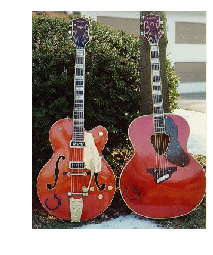

guitar (score = 0.97017)
animal (score = 0.00881)
flower (score = 0.00851)
plane (score = 0.00663)
house (score = 0.00587)
images/guitar3.jpg


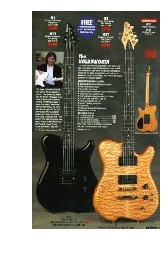

guitar (score = 0.98615)
house (score = 0.00395)
animal (score = 0.00349)
flower (score = 0.00349)
plane (score = 0.00292)
images/house1.jpg


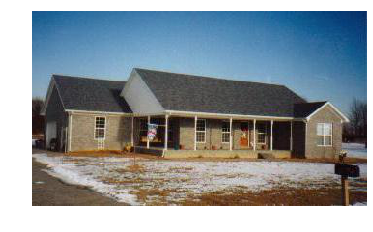

house (score = 0.93357)
flower (score = 0.02503)
animal (score = 0.01951)
plane (score = 0.01377)
guitar (score = 0.00812)
images/house2.jpg


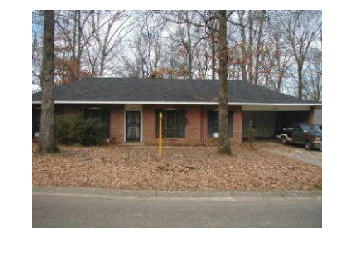

house (score = 0.98739)
animal (score = 0.00486)
flower (score = 0.00318)
plane (score = 0.00312)
guitar (score = 0.00144)
images/house3.jpg


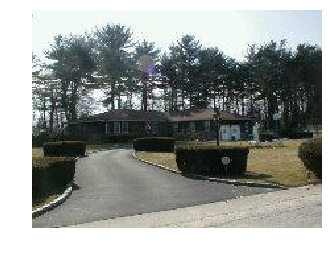

house (score = 0.93518)
plane (score = 0.02021)
flower (score = 0.01785)
animal (score = 0.01579)
guitar (score = 0.01097)
images/plane1.jpg


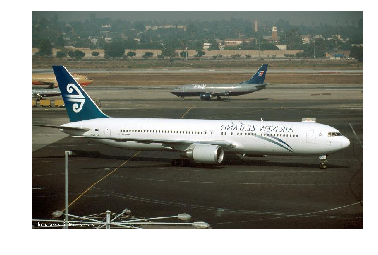

plane (score = 0.95958)
animal (score = 0.01672)
guitar (score = 0.00843)
flower (score = 0.00769)
house (score = 0.00758)
images/plane2.jpg


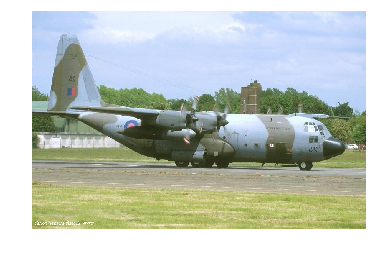

plane (score = 0.88774)
animal (score = 0.04354)
flower (score = 0.02940)
guitar (score = 0.01984)
house (score = 0.01948)
images/plane3.jpg


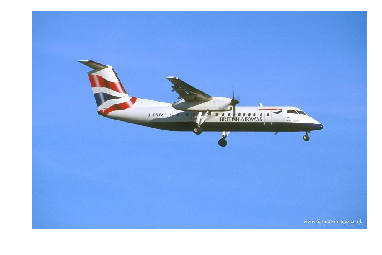

plane (score = 0.97783)
animal (score = 0.00888)
flower (score = 0.00467)
house (score = 0.00459)
guitar (score = 0.00402)


In [6]:
lines = tf.gfile.GFile('output_labels.txt').readlines()
uid_to_human = {}

#读取数据
for uid,line in enumerate(lines):
    line = line.strip('\n')
    uid_to_human[uid] = line
    
#分类编号变成描述
def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]

#导入模型
with tf.gfile.GFile('output_graph.pb','rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def,name = '')

with tf.Session() as sess:
    #final_result 为输出Tensor的名字
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    for root,dirs,files in os.walk('images/'):
        for file in files:
            image_data = tf.gfile.GFile(os.path.join(root,file),'rb').read()
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0':image_data})
            
            predictions = np.squeeze(predictions)
            image_path = os.path.join(root,file)
            print(image_path)
            
            img = Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            
            top_k = predictions.argsort()[::-1]
            for node_id in top_k:
            #获取分类的名称
                human_string = id_to_string(node_id)
                score = predictions[node_id]
                print('%s (score = %.5f)'%(human_string,score))
                
            